**b) Write a python program to compute Mean, Median, Mode, Variance, Standard Deviation using Datasets**

In [ ]:
import statistics

data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 6]

mean = statistics.mean(data)
print("Mean:", mean)

median = statistics.median(data)
print("Median:", median)

mode = statistics.mode(data)
print("Mode:", mode)

variance = statistics.variance(data)
print("Variance:", variance)

std_dev = statistics.stdev(data)
print("Standard Deviation:", std_dev)

Mean: 5.545454545454546
Median: 6
Mode: 6
Variance: 8.272727272727273
Standard Deviation: 2.8762349126466136


**Demonstrate various data pre-processing techniques for a given dataset.**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

data = {'Numerical_Col_1': [10, 20, np.nan, 40, 50],
        'Numerical_Col_2': [1.1, 2.2, 3.3, np.nan, 5.5],
        'Categorical_Col': ['A', 'B', 'A', 'C', 'B']}
df = pd.DataFrame(data)

print("Original DataFrame:")
print(df)

numerical_imputer = SimpleImputer(strategy='mean')

categorical_imputer = SimpleImputer(strategy='most_frequent')

one_hot_encoder = OneHotEncoder(handle_unknown='ignore')

min_max_scaler = MinMaxScaler()

standard_scaler = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('num_impute_scale_minmax', Pipeline([('imputer', numerical_imputer), ('scaler', min_max_scaler)]), ['Numerical_Col_1', 'Numerical_Col_2']),
        ('cat_impute_encode', Pipeline([('imputer', categorical_imputer), ('encoder', one_hot_encoder)]), ['Categorical_Col'])
    ])

df_processed = preprocessor.fit_transform(df)

feature_names = preprocessor.named_transformers_['cat_impute_encode'].named_steps['encoder'].get_feature_names_out(['Categorical_Col']).tolist()
processed_column_names = ['Numerical_Col_1_minmax', 'Numerical_Col_2_minmax'] + feature_names

df_processed_df = pd.DataFrame(df_processed, columns=processed_column_names)

print("\nProcessed DataFrame:")
df_processed_df

Original DataFrame:
   Numerical_Col_1  Numerical_Col_2 Categorical_Col
0             10.0              1.1               A
1             20.0              2.2               B
2              NaN              3.3               A
3             40.0              NaN               C
4             50.0              5.5               B

Processed DataFrame:


,Numerical_Col_1_minmax,Numerical_Col_2_minmax,Categorical_Col_A,Categorical_Col_B,Categorical_Col_C
0,0.00,0.0000,1.0,0.0,0.0
1,0.25,0.2500,0.0,1.0,0.0
2,0.50,0.5000,1.0,0.0,0.0
3,0.75,0.4375,0.0,0.0,1.0
4,1.00,1.0000,0.0,1.0,0.0


**Write a python program to compute
Reshaping the data,
Filtering the data
Merging the data
Handling the missing values in datasets
Feature Normalization: Min-max normalization**

In [ ]:
import pandas as pd

# Reshaping data
data_for_pivot = {'Category': ['A', 'B', 'A', 'B', 'A'],
                  'Metric': ['X', 'X', 'Y', 'Y', 'X'],
                  'Value': [10, 20, 30, 40, 50]}
df_pivot = pd.DataFrame(data_for_pivot)

print("\nOriginal DataFrame for Pivot:")
print(df_pivot)

df_reshaped_pivot = df_pivot.pivot_table(index='Category', columns='Metric', values='Value', aggfunc='sum')
print("\nReshaped DataFrame (Pivot):")
print(df_reshaped_pivot)

# Filtering the data
df_filtered = df[df['Numerical_Col_1'] > 30]
print("\nFiltered DataFrame (Numerical_Col_1 > 30):")
print(df_filtered)

# Merging the data
data_left = {'ID': [1, 2, 3, 4],
             'Left_Value': ['A', 'B', 'C', 'D']}
df_left = pd.DataFrame(data_left)

data_right = {'ID': [3, 4, 5, 6],
              'Right_Value': ['X', 'Y', 'Z', 'W']}
df_right = pd.DataFrame(data_right)

print("\nLeft DataFrame for Merging:")
print(df_left)
print("\nRight DataFrame for Merging:")
print(df_right)

df_merged = pd.merge(df_left, df_right, on='ID', how='inner')
print("\nMerged DataFrame (Inner Join):")
print(df_merged)

print("\nFeature Normalization (Min-max) applied via the preprocessor pipeline:")
df_processed_df[['Numerical_Col_1_minmax', 'Numerical_Col_2_minmax']]


Original DataFrame for Pivot:
  Category Metric  Value
0        A      X     10
1        B      X     20
2        A      Y     30
3        B      Y     40
4        A      X     50

Reshaped DataFrame (Pivot):
Metric     X   Y
Category        
A         60  30
B         20  40

Filtered DataFrame (Numerical_Col_1 > 30):
   Numerical_Col_1  Numerical_Col_2 Categorical_Col
3             40.0              NaN               C
4             50.0              5.5               B

Left DataFrame for Merging:
   ID Left_Value
0   1          A
1   2          B
2   3          C
3   4          D

Right DataFrame for Merging:
   ID Right_Value
0   3           X
1   4           Y
2   5           Z
3   6           W

Merged DataFrame (Inner Join):
   ID Left_Value Right_Value
0   3          C           X
1   4          D           Y

Feature Normalization (Min-max) applied via the preprocessor pipeline:


,Numerical_Col_1_minmax,Numerical_Col_2_minmax
0,0.00,0.0000
1,0.25,0.2500
2,0.50,0.5000
3,0.75,0.4375
4,1.00,1.0000


In [ ]:
import pandas as pd
from io import StringIO

data = """id,first,last,gender,Marks,selected
1,Leone,Debrick,Female,50,TRUE
2,Romola,Phinnessy,Female,60,FALSE
3,Geri,Prium,Male,65,FALSE
4,Sandy,Doveston,Female,95,FALSE
5,Jacenta,Jansik,Female,31,TRUE
6,Diane-marie,Medhurst,Female,45,TRUE
7,Austen,Pool,Male,45,TRUE
8,Vanya,Teffrey,Male,70,FALSE
9,Giordano,Elloy,Male,36,FALSE
10,Rozele,Fawcett,Female,50,FALSE"""

df = pd.read_csv(StringIO(data))

print("Objective 1: Statistical Operations on 'Marks'")
print("Mean:", df['Marks'].mean())
print("Median:", df['Marks'].median())
print("Mode:", df['Marks'].mode().tolist())
print("Standard Deviation:", df['Marks'].std())
print("Variance:", df['Marks'].var())
print("Minimum:", df['Marks'].min())
print("Maximum:", df['Marks'].max())
print("Sum:", df['Marks'].sum())
print("Count:", df['Marks'].count())

print("\nObjective 2: Describe on Numerical Columns")
print(df.describe())

print("\nDescribe on Categorical/Boolean Columns")
print(df.describe(include=['object', 'bool']))

print("\nObjective 3: Univariate descriptive stats on 'Marks'")
print(df['Marks'].describe())

print("\nBivariate descriptive stats: Marks by Gender")
print(df.groupby('gender')['Marks'].describe())

print("\nCorrelation between numeric variables (Marks and id)")
print(df[['Marks', 'id']].corr())

Objective 1: Statistical Operations on 'Marks'
Mean: 54.7
Median: 50.0
Mode: [45, 50]
Standard Deviation: 18.666964283341724
Variance: 348.4555555555555
Minimum: 31
Maximum: 95
Sum: 547
Count: 10

Objective 2: Describe on Numerical Columns
             id      Marks
count  10.00000  10.000000
mean    5.50000  54.700000
std     3.02765  18.666964
min     1.00000  31.000000
25%     3.25000  45.000000
50%     5.50000  50.000000
75%     7.75000  63.750000
max    10.00000  95.000000

Describe on Categorical/Boolean Columns
        first     last  gender selected
count      10       10      10       10
unique     10       10       2        2
top     Leone  Debrick  Female    False
freq        1        1       6        6

Objective 3: Univariate descriptive stats on 'Marks'
count    10.000000
mean     54.700000
std      18.666964
min      31.000000
25%      45.000000
50%      50.000000
75%      63.750000
max      95.000000
Name: Marks, dtype: float64

Bivariate descriptive stats: Marks by Gen

In [ ]:
import pandas as pd
from io import StringIO
from sklearn.preprocessing import LabelEncoder, StandardScaler, Binarizer

data = """id,first,last,gender,Marks,selected
1,Leone,Debrick,Female,50,TRUE
2,Romola,Phinnessy,Female,60,FALSE
3,Geri,Prium,Male,65,FALSE
4,Sandy,Doveston,Female,95,FALSE
5,Jacenta,Jansik,Female,31,TRUE
6,Diane-marie,Medhurst,Female,45,TRUE
7,Austen,Pool,Male,45,TRUE
8,Vanya,Teffrey,Male,70,FALSE
9,Giordano,Elloy,Male,36,FALSE
10,Rozele,Fawcett,Female,50,FALSE"""

df = pd.read_csv(StringIO(data))

print("Original DataFrame:")
print(df)

print("\nLabel Encoding")
le_gender = LabelEncoder()
df['gender_encoded'] = le_gender.fit_transform(df['gender'])
print("Gender labels:", list(le_gender.classes_))
print(df[['gender', 'gender_encoded']])

le_selected = LabelEncoder()
df['selected_encoded'] = le_selected.fit_transform(df['selected'])
print("\nSelected labels:", list(le_selected.classes_))
print(df[['selected', 'selected_encoded']])

print("\nScaling 'Marks' with StandardScaler")
scaler = StandardScaler()
df['Marks_scaled'] = scaler.fit_transform(df[['Marks']])
print(df[['Marks', 'Marks_scaled']])

print("\nBinarizing 'Marks' with threshold 50")
binarizer = Binarizer(threshold=50)
df['Marks_binarized'] = binarizer.fit_transform(df[['Marks']])
print(df[['Marks', 'Marks_binarized']])


Original DataFrame:
   id        first       last  gender  Marks  selected
0   1        Leone    Debrick  Female     50      True
1   2       Romola  Phinnessy  Female     60     False
2   3         Geri      Prium    Male     65     False
3   4        Sandy   Doveston  Female     95     False
4   5      Jacenta     Jansik  Female     31      True
5   6  Diane-marie   Medhurst  Female     45      True
6   7       Austen       Pool    Male     45      True
7   8        Vanya    Teffrey    Male     70     False
8   9     Giordano      Elloy    Male     36     False
9  10       Rozele    Fawcett  Female     50     False

Label Encoding
Gender labels: ['Female', 'Male']
   gender  gender_encoded
0  Female               0
1  Female               0
2    Male               1
3  Female               0
4  Female               0
5  Female               0
6    Male               1
7    Male               1
8    Male               1
9  Female               0

Selected labels: [np.False_, np.True_]

Original shape: (150, 4)
Reduced shape: (150, 2)
Explained Variance Ratio: [0.72962445 0.22850762]


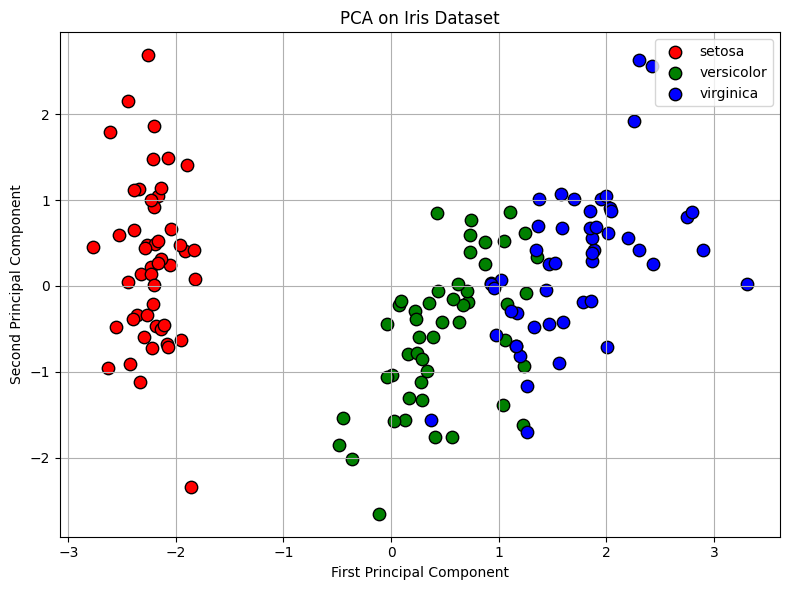

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Step 1: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Apply PCA to reduce dimensions to 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Step 3: Print shape and explained variance
print("Original shape:", X.shape)
print("Reduced shape:", X_pca.shape)
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

# Step 4: Plot PCA result
plt.figure(figsize=(8, 6))
colors = ['r', 'g', 'b']
for i, color, label in zip(range(len(target_names)), colors, target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1],
                color=color, label=label, edgecolor='k', s=80)

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA on Iris Dataset')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()